In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


from astropy.io import ascii
from astropy.io import fits
from astropy.table import Table, Column, join
from astropy.wcs import WCS

In [2]:
# Plotting Parameters
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] =18
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['ytick.minor.size'] = 5

In [3]:
# Reduced data in txt files
red_dat_path = "A:/Documents/Grad_School/Research/igrins_reduced_text/"
fig_path = "A:/Documents/Grad_School/Research/"
# Glob the H band txt files
k_spec_files = glob.glob(red_dat_path+"*_K_*.txt")

In [4]:
# Preliminary look at mho8, an M5 spectral type in Taurus, total int time of 300
mho8_files = glob.glob(red_dat_path+"*mho8*_k_*")
mho8_files

['A:/Documents/Grad_School/Research/igrins_reduced_text\\MHO8_20190124_K_0085_spec_A0v.txt']

In [5]:
# Use pandas to read the .txt file and create a data frame
# Skip first few lines of header, change "-NaN" to NaN in the signal-to-noise columns
mho8_df = pd.read_csv(mho8_files[0],skiprows=7, delim_whitespace=True,na_values=['-NaN'])
# Make column names
mho8_df.columns = ["Spectral Index", "Wavelength", "Flux", "SNR"]
# Define thresholds for SNR and Flux
snr_threshold = 5
flux_threshold = 0
# Do the selection using pandas dataframe magic
mho8_df = mho8_df[(mho8_df["SNR"] > snr_threshold) & (mho8_df["Flux"] > flux_threshold)]
mho8_df

,Spectral Index,Wavelength,Flux,SNR
4,0.0,1.86641,2218550.0,6.16540
879,0.0,1.87826,10320200.0,5.42128
1209,0.0,1.88242,356591.0,5.23723
1219,0.0,1.88254,467981.0,6.50777
1229,0.0,1.88266,397929.0,5.47859
...,...,...,...,...
49078,23.0,2.48318,228338.0,5.66401
49080,23.0,2.48321,332806.0,6.17284
49084,23.0,2.48327,256809.0,5.55174
49773,24.0,2.49586,495800.0,5.30986


In [6]:
# Wavelength (microns)
mho8_wavlen = mho8_df['Wavelength']
# Flux (counts)
mho8_flux = mho8_df['Flux']

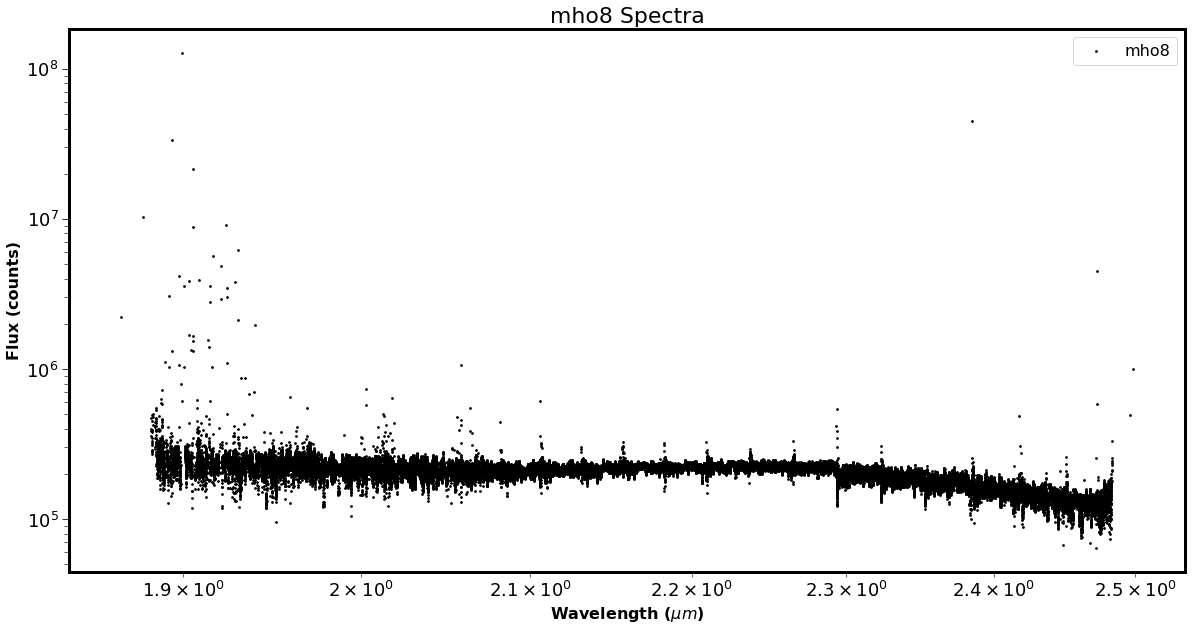

In [8]:
# for wavlen,flux in zip(mho8_wavlen,mho8_flux):

fig,ax = plt.subplots(figsize=(20,10))

# Plot wavelength vs flux
# there is definitely a way to do this with a for loop but oh well
ax.scatter(mho8_wavlen, mho8_flux,label="mho8",s=3,c="black")

# ax.set_xlim(1.55,1.56)
ax.set_xscale('log')
ax.set_yscale('log')

ax.legend(loc='best')

ax.set_title("mho8 Spectra", fontsize = 22)
ax.set_xlabel('Wavelength ($\mu m$)',fontsize=16)
ax.set_ylabel('Flux (counts)',fontsize=16)

plt.savefig(fig_path + "mho8_igrins_spectra" + '.png',facecolor='white')
plt.show()